In [1]:
!wget https://machinehack-be.s3.amazonaws.com/flower_class_recognition_weekend_hackathon_17/Participants_Data.zip

--2020-08-24 19:24:19--  https://machinehack-be.s3.amazonaws.com/flower_class_recognition_weekend_hackathon_17/Participants_Data.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.66.52
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.66.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383941 (375K) [application/zip]
Saving to: ‘Participants_Data.zip’

Participants_Data.z 100%[===================>] 374.94K   382KB/s    in 1.0s    

2020-08-24 19:24:21 (382 KB/s) - ‘Participants_Data.zip’ saved [383941/383941]



In [2]:
!unzip Participants_Data.zip

Archive:  Participants_Data.zip
   creating: Participants_Data/
  inflating: Participants_Data/Test.csv  
  inflating: __MACOSX/Participants_Data/._Test.csv  
  inflating: Participants_Data/Train.csv  
  inflating: __MACOSX/Participants_Data/._Train.csv  
  inflating: Participants_Data/sample_submission.csv  
  inflating: __MACOSX/Participants_Data/._sample_submission.csv  


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
train = pd.read_csv('Participants_Data/Train.csv')
test = pd.read_csv('Participants_Data/Test.csv')
sub = pd.read_csv('Participants_Data/sample_submission.csv')

In [70]:
train.head(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


In [71]:
test.tail(5)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Species
29550,20833,1,1170,5.5,11.0,77
29551,28896,12,834,3.0,9.0,156
29552,2193,20,2169,7.5,32.0,49
29553,25195,10,1425,8.0,35.0,28
29554,8711,5,122,4.0,40.0,249


In [72]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Area_Code        0
 Locality_Code    0
 Region_Code      0
 Height           0
 Diameter         0
 Class            0
 Species          0
 dtype: int64, Area_Code        0
 Locality_Code    0
 Region_Code      0
 Height           0
 Diameter         0
 Species          0
 dtype: int64, (12666, 7), (29555, 6), Area_Code          int64
 Locality_Code      int64
 Region_Code        int64
 Height           float64
 Diameter         float64
 Class              int64
 Species            int64
 dtype: object)

In [73]:
for x in train.columns:
    print(train[x].value_counts(normalize=True))

28502    0.028975
28522    0.003711
4638     0.003553
28518    0.003079
4557     0.002763
           ...   
6582     0.000079
29107    0.000079
14770    0.000079
8625     0.000079
2049     0.000079
Name: Area_Code, Length: 10122, dtype: float64
10    0.073188
15    0.066635
12    0.059529
17    0.057082
4     0.056135
11    0.053924
13    0.052898
8     0.050134
20    0.048871
3     0.047924
16    0.045002
6     0.041213
21    0.040818
9     0.040660
18    0.040344
14    0.040344
1     0.040344
19    0.039713
5     0.038765
2     0.036002
7     0.030475
Name: Locality_Code, dtype: float64
0       0.006316
834     0.004816
970     0.004737
1432    0.004342
2002    0.004184
          ...   
2180    0.000079
658     0.000079
539     0.000079
1182    0.000079
1533    0.000079
Name: Region_Code, Length: 1870, dtype: float64
3.0     0.262672
7.5     0.154350
4.0     0.072951
5.0     0.059214
0.0     0.046897
          ...   
4.7     0.000079
20.5    0.000079
6.3     0.000079
1.6     0.000079

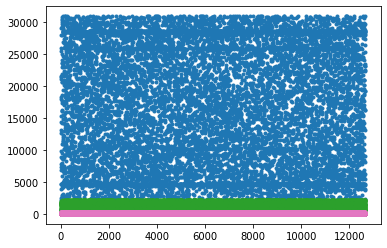

In [74]:
plt.plot(train,' .')

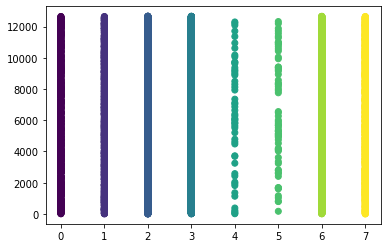

In [75]:
plt.scatter(x=train.values[:,5],y=range(len(train)),c=train['Class'])

In [76]:
df=train.append(test,ignore_index=True)

In [77]:
df.nunique()

Area_Code        30900
Locality_Code       22
Region_Code       2185
Height             110
Diameter           151
Class                8
Species            263
dtype: int64

In [78]:
#df['Area_region']=df['Area_Code']//df['Region_Code']
#df['A_r_sum']=df['Area_Code']+df['Region_Code']
#df['via']=df['Diameter']*df['Height']

In [79]:
temp = df.groupby('Locality_Code').agg(
    {
        'Height' : ['max', 'mean', 'sum' , 'median'],
        'Diameter' : ['max', 'mean', 'sum', 'median'],
        'Species' : ['count']
    }
)

temp.columns = ['_'.join(x) for x in temp.columns]
df = pd.merge(df, temp, on=['Locality_Code'], how='left')


temp = df.groupby('Species').agg(
    {
        'Height' : ['max', 'mean', 'sum', 'median'],
        'Diameter' : ['max', 'mean', 'sum', 'median']
    }
)

temp.columns = [' '.join(x) for x in temp.columns]

df = pd.merge(df, temp, on=['Species'], how='left')

temp = df.groupby('Region_Code').agg(
    {
        'Height' : ['max', 'mean', 'sum', 'median'],
        'Diameter' : ['max', 'mean', 'sum', 'median']
    }
)

temp.columns = ['-'.join(x) for x in temp.columns]

df = pd.merge(df, temp, on=['Region_Code'], how='left')

temp = df.groupby('Area_Code').agg(
    {
        'Height' : ['max', 'mean', 'sum', 'median'],
        'Diameter' : ['max', 'mean', 'sum', 'median']
    }
)

temp.columns = ['~'.join(x) for x in temp.columns]

df = pd.merge(df, temp, on=['Area_Code'], how='left')

In [65]:
df = pd.get_dummies(df, columns=['Locality_Code'])

In [80]:
df.tail(2)

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species,Height_max,Height_mean,Height_sum,Height_median,Diameter_max,Diameter_mean,Diameter_sum,Diameter_median,Species_count,Height max,Height mean,Height sum,Height median,Diameter max,Diameter mean,Diameter sum,Diameter median,Height-max,Height-mean,Height-sum,Height-median,Diameter-max,Diameter-mean,Diameter-sum,Diameter-median,Height~max,Height~mean,Height~sum,Height~median,Diameter~max,Diameter~mean,Diameter~sum,Diameter~median
42219,25195,10,1425,8.0,35.0,NaN,28,35.0,5.567813,17160.0,5.0,115.0,25.970149,80040.0,21.0,3082,18.0,9.216000,2304.0,9.5,93.0,47.920000,11980.0,51.0,16.5,6.508475,384.0,6.5,73.0,31.542373,1861.0,25.0,8.0,8.0,8.0,8.0,35.0,35.000000,35.0,35.0
42220,8711,5,122,4.0,40.0,NaN,249,23.0,6.440666,10247.1,6.0,170.0,34.353237,54656.0,32.0,1591,17.5,5.794464,16328.8,5.5,111.0,38.956707,109780.0,37.0,8.0,4.692308,61.0,4.0,45.0,35.692308,464.0,38.0,7.5,4.5,13.5,4.0,40.0,25.333333,76.0,29.0


In [81]:
train = df[df['Class'].isnull()==False]
test = df[df['Class'].isnull()==True]
del test['Class']

In [18]:
train_df=train
test_df=test

In [19]:
X = train_df.drop(labels=['Class'], axis=1)
y = train_df['Class'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

In [21]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((11399, 52), (11399,), (1267, 52), (1267,))

In [22]:
from sklearn.metrics import log_loss

In [23]:

import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'multiclass',
         'num_class': 8,
         'boosting': 'gbdt',  
         'metric': 'multi_logloss',
         'learning_rate': 0.02, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 15,
        # 'bagging_fraction':0.9,
        # 'bagging_freq': 2,
         'feature_fraction': 0.9,
         'lambda_l2': 0.9,
         'min_data_per_group': 75,
         'max_bin': 255,
         'is_unbalance':True
         }

clf = lgb.train(params=param, 
                early_stopping_rounds=200,
                verbose_eval=100,
                train_set=train_data,
                valid_sets=[test_data])

y_pred = clf.predict(X_cv)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.878192
[200]	valid_0's multi_logloss: 0.763119
[300]	valid_0's multi_logloss: 0.738284
[400]	valid_0's multi_logloss: 0.732552
[500]	valid_0's multi_logloss: 0.734535
Early stopping, best iteration is:
[366]	valid_0's multi_logloss: 0.732181


In [24]:
log_loss(y_cv, y_pred)

0.7321807834106768

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


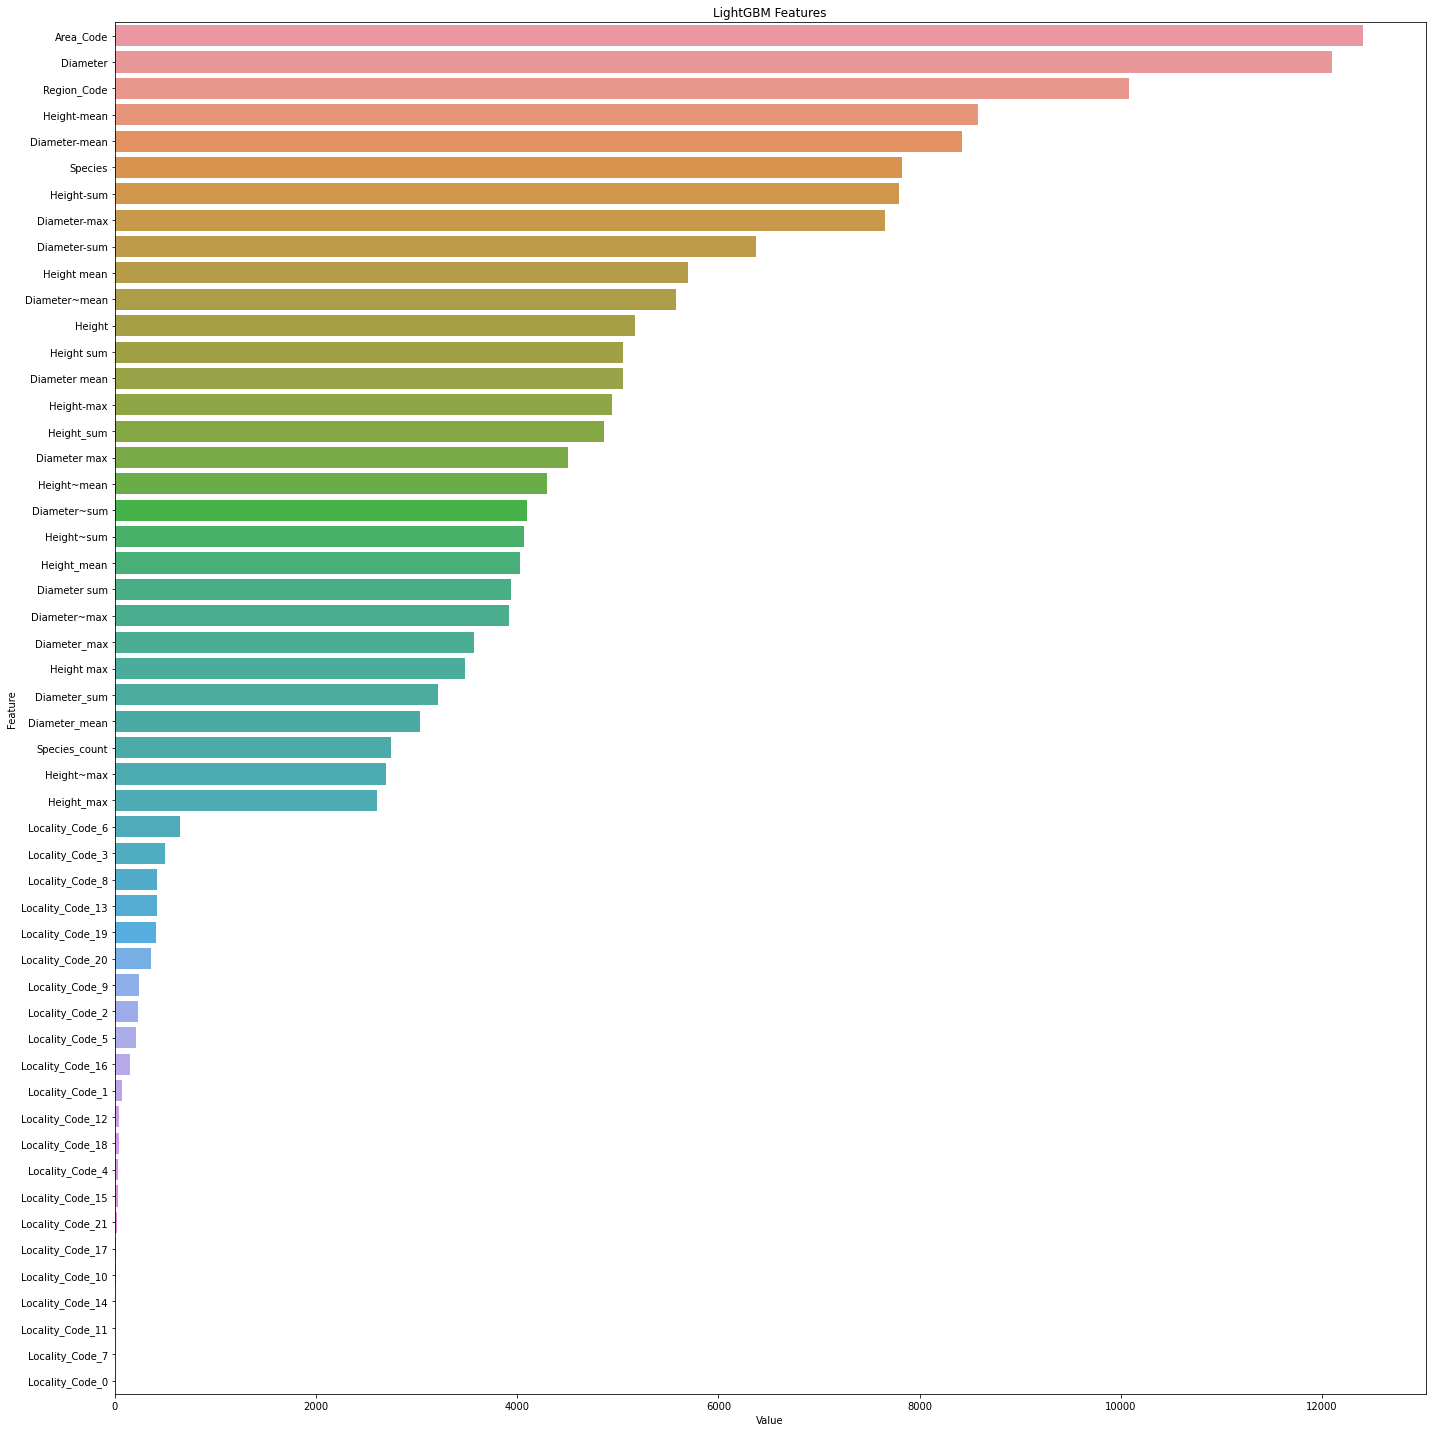

In [25]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(), X.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(20,20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [26]:
Xtest = test_df

In [28]:

from sklearn.model_selection import KFold, StratifiedKFold

errlgb = []
y_pred_totlgb = []

fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=2**31)

for train_index, test_index in fold.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)
    
    clf = lgb.train(params=param, 
                     early_stopping_rounds=200,
                     verbose_eval=100,
                     train_set=train_data,
                     valid_sets=[test_data])

    y_pred = clf.predict(X_test)
    print("Log Loss: ", (log_loss(y_test, y_pred)))
    
    errlgb.append(log_loss(y_test, y_pred))
    p = clf.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.876127
[200]	valid_0's multi_logloss: 0.763774
[300]	valid_0's multi_logloss: 0.735309
[400]	valid_0's multi_logloss: 0.730588
[500]	valid_0's multi_logloss: 0.735577
Early stopping, best iteration is:
[377]	valid_0's multi_logloss: 0.730334
Log Loss:  0.730334020740011


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.89088
[200]	valid_0's multi_logloss: 0.779721
[300]	valid_0's multi_logloss: 0.750496
[400]	valid_0's multi_logloss: 0.744605
[500]	valid_0's multi_logloss: 0.749005
Early stopping, best iteration is:
[388]	valid_0's multi_logloss: 0.744323
Log Loss:  0.7443231038011292


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.899612
[200]	valid_0's multi_logloss: 0.797347
[300]	valid_0's multi_logloss: 0.773703
[400]	valid_0's multi_logloss: 0.772854
[500]	valid_0's multi_logloss: 0.782245
Early stopping, best iteration is:
[353]	valid_0's multi_logloss: 0.771045
Log Loss:  0.7710447509648916


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's multi_logloss: 0.90989
[200]	valid_0's multi_logloss: 0.808304
[300]	valid_0's multi_logloss: 0.785923
[400]	valid_0's multi_logloss: 0.788286
[500]	valid_0's multi_logloss: 0.796997
Early stopping, best iteration is:
[318]	valid_0's multi_logloss: 0.785686
Log Loss:  0.7856856642792924


In [29]:
np.mean(errlgb,0)

0.757846884946331

In [30]:
y_pred = np.mean(y_pred_totlgb,0)

In [31]:
submission = pd.DataFrame(data=y_pred, columns=sub.columns)
submission.head()

,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7
0,0.003039,0.010618,0.164613,0.030534,0.000208,0.000155,0.785163,0.005670
1,0.000905,0.015384,0.008852,0.013459,0.000102,0.000105,0.012520,0.948674
2,0.001212,0.001469,0.008164,0.914612,0.000080,0.000515,0.072689,0.001259
3,0.001439,0.008561,0.004063,0.001466,0.000057,0.000028,0.001691,0.982694
4,0.001395,0.018181,0.417362,0.014877,0.000139,0.000181,0.545408,0.002458


In [ ]:
#submission[submission<0.0005]=0
#submission[submission>0.95]=1
#submission.head()

In [ ]:
submission.to_csv('Mh_10.csv', index=False)